In [1]:
import random
import numpy as np
import warnings

import dataset
import taylor_spline

random.seed(0)
np.random.seed(0)
warnings.filterwarnings('ignore')

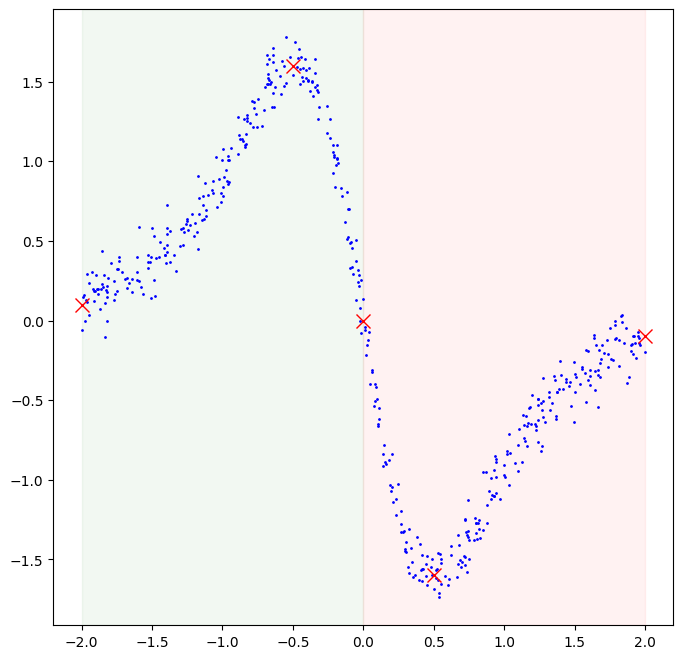

In [2]:
S = dataset.MagmanDataset()# TrigonDataset()
S.sample(size=500, noise=0.1)
S.plot()

In [3]:
"""tspl = taylor_spline.TaylorSpline(0., 3, S.xl, S.xu)
tspl.fit(S)

print(f"Fitness: {tspl.fitness(S)}")
S.plot()
tspl.plot()"""

'tspl = taylor_spline.TaylorSpline(0., 3, S.xl, S.xu)\ntspl.fit(S)\n\nprint(f"Fitness: {tspl.fitness(S)}")\nS.plot()\ntspl.plot()'

In [4]:
from matplotlib import pyplot as plt

tspline_conn = taylor_spline.TaylorSplineConnector()
tsplines = tspline_conn.fit(S, 4, silent=True)

ExpRadius = 0.8
Fitting on x0 = 0.0 to [-0.8, 0.8]
Fitting on x0 = 0.256 to [-0.544, 1.056]
Fitting on x0 = 0.6400000000000001 to [-0.15999999999999992, 1.4400000000000002]
Fitting on x0 = 1.0240000000000002 to [0.2240000000000002, 1.8240000000000003]
Fitting on x0 = 1.4080000000000004 to [0.6080000000000003, 2.208]
Fitting on x0 = 1.7920000000000005 to [0.9920000000000004, 2.5920000000000005]
Fitting on x0 = -0.256 to [-1.056, 0.544]
Fitting on x0 = -0.6400000000000001 to [-1.4400000000000002, 0.15999999999999992]
Fitting on x0 = -1.0240000000000002 to [-1.8240000000000003, -0.2240000000000002]
Fitting on x0 = -1.4080000000000004 to [-2.208, -0.6080000000000003]
Fitting on x0 = -1.7920000000000005 to [-2.5920000000000005, -0.9920000000000004]


Fitness: -0.7835650209450647
Fitness: -0.44558170687751714
Fitness: -0.6654444721129589
Fitness: -0.5911281158479775
Fitness: -0.5389202647549473
Fitness: -0.2727366181704211
Fitness: -0.39342167266007894
Fitness: -0.5576299613001326
Fitness: -0.43214922422118085
Fitness: -0.4467761417540544
Fitness: -0.3790301895316874


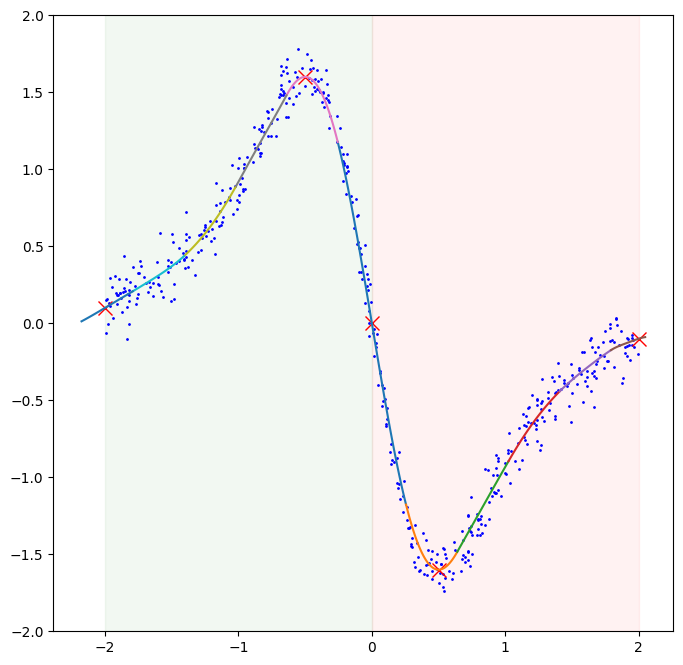

In [5]:
S.plot()
for ts in tsplines:
    print(f"Fitness: {ts.fitness(S)}")
    ts.plot(show=False)
plt.show()